In [1]:
! pip install pygwalker
! pip install seaborn

In [2]:
import pandas as pd
import sklearn
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')


In [3]:
data = pd.read_csv('../20_6_2024/file/data.csv')

In [4]:
data.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
# kiểm tra xem hàng nào trùng thông tin nhau kh
data.duplicated().sum()

0

In [7]:
# đếm số lượng giá trị duy nhất trong mỗi cột
# vd: gender là 0/1 => 2 , customer_id mỗi người là khác nhau nên => 10000 (10000 khách hàng)
data.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [8]:
# xóa côt: truyền cột muốn xóa , axis = 1
# xóa hàng : truyền index hàng muốn xóa (index bắt đầu = 0)
data = data.drop(['customer_id'], axis=1)

In [9]:
data.head(5)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Get percentage of each class in target column (churn column)
# lọc ra những hàng có churn == 0
data[data['churn'] == 0]

# lấy mỗi cột churn
data.churn[data['churn'] == 0]

# tính count
churn_0 = data.churn[data['churn'] == 0].count()
churn_1 = data.churn[data['churn'] == 1].count()
print(churn_0)
print(churn_1)

7963
2037


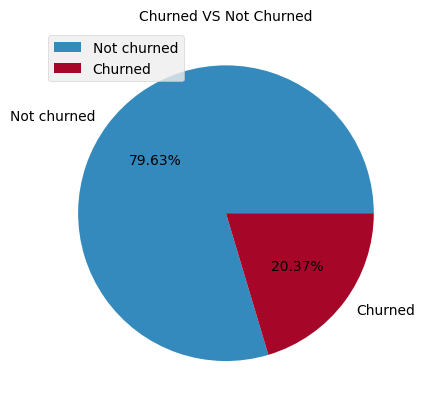

In [11]:
sizes = [churn_0, churn_1]
labels = ['Not churned', 'Churned']

fig, ax = plt.subplots()

# %% giúp hiển thị dấu %, %.2f : chuyển thành float và lấy số thập phân thứ 2

ax.pie(sizes,labels=labels ,autopct='%.2f%%')
plt.legend(loc = 'upper left')
plt.title("Churned VS Not Churned", size=10)
plt.show()

<Axes: title={'center': 'credit_score'}, ylabel='Frequency'>

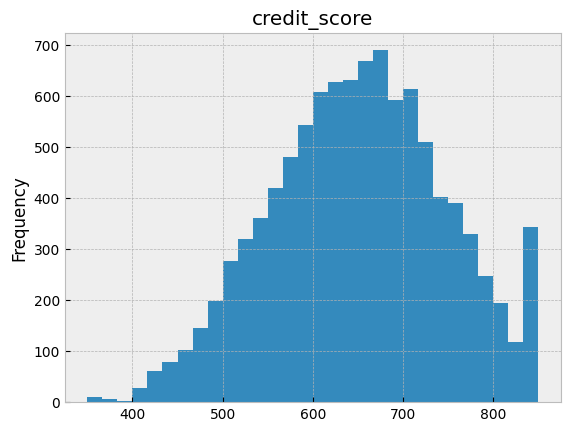

In [17]:
# xài plot của pandas để vẽ
# bins : mỗi cột chia thành khoảng 20 giá trị
data['credit_score'].plot(kind='hist', bins=20, title='credit_score')

In [19]:
# Get unique value of this column
countries = data['country'].unique()
print(countries)

['France' 'Spain' 'Germany']


In [22]:
# value_counts: đếm tần suất xuất hiện của các gtri duy nhất của 1 cột
print(data['country'].value_counts())

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


<Axes: xlabel='country', ylabel='count'>

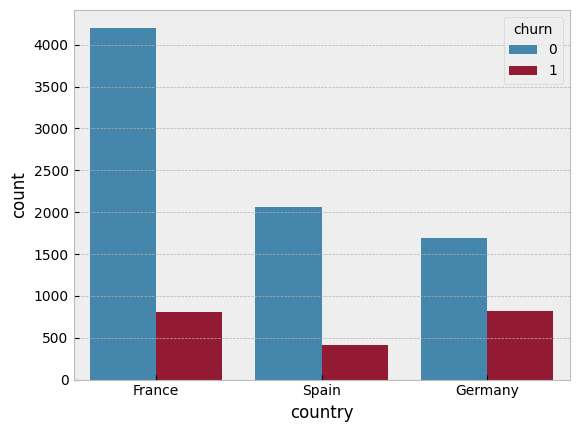

In [26]:
# hiển thị số lượng churn_0 và churn_1 mỗi quốc gia
# hue để thêm 1 chiều phân loại vào cùng 1 biểu đồ
sns.countplot(x='country', hue='churn', data=data)